# Data Cleaning, EDA, and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import nltk
import string
import re
from wordcloud import WordCloud

### Read in data and make dataframes for each CSV

In [3]:
sr1_df = pd.read_csv('./datasets/subreddit1.csv')
sr0_df = pd.read_csv('./datasets/subreddit0.csv')
#sr2_df = pd.read_csv('./datasets/subreddit2.csv')

### Data Cleaning and EDA

In [4]:
sr1_df=sr1_df.dropna().reset_index(drop=True)
sr1_df[sr1_df['posts']=='']

,names,titles,posts,subreddit


In [5]:
sr0_df=sr0_df.dropna().reset_index(drop=True)
sr0_df[sr0_df['posts']=='']

,names,titles,posts,subreddit


In [6]:
#Combine both dataframes and shuffle rows. 
comb_df = pd.concat([sr1_df,sr0_df]).reset_index(drop=True)

In [7]:
comb_df = shuffle(comb_df).reset_index(drop=True)
comb_df.head()

,names,titles,posts,subreddit
0,t3_bz8vnk,Fair quote for cost of major dental work?,"Hello everyone,\n\n&amp;#x200B;\n\nMy mom is o...",1
1,t3_bz1sfn,"I'm dumb, and I accidentally received my lump ...",Hello. So today I received my 403B plan's lump...,1
2,t3_bz0763,How to Learn to Invest and Trade? Best way to ...,Hello everyone. \n\nI have a long list of book...,1
3,t3_bytdqh,Advice needed: How to invest to prepare to be ...,My husband and I are reviewing our investment ...,1
4,t3_bz1dw2,Can I afford this house?,My husband and I recently got married and we w...,1


In [8]:
#Check class balances between posts from the two subreddits
comb_df.subreddit.value_counts(normalize=True)

0    0.511749
1    0.488251
Name: subreddit, dtype: float64

In [9]:
#This function cleans up text that is fed to it, using regular expressions.

def clean_text(text):
    # remove HTML tags and URLs
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*','',text)
    
    # keep only text without punctuation
    text = re.sub(r'[^\w\s]','',text)
    
    # convert text to lowercase
    text = text.strip().lower()

    # split text into a list of words
    token_text = re.split('\W+',text) #W+ --> word chars and dashes permitted
    
    return token_text

In [10]:
comb_df['post_tokens'] = comb_df['posts'].apply(lambda x: clean_text(x))
comb_df['title_tokens'] = comb_df['titles'].apply(lambda x: clean_text(x))
comb_df = comb_df[['subreddit','names','titles','title_tokens','posts','post_tokens']]
comb_df.head()

,subreddit,names,titles,title_tokens,posts,post_tokens
0,1,t3_bz8vnk,Fair quote for cost of major dental work?,"[fair, quote, for, cost, of, major, dental, work]","Hello everyone,\n\n&amp;#x200B;\n\nMy mom is o...","[hello, everyone, ampx200b, my, mom, is, one, ..."
1,1,t3_bz1sfn,"I'm dumb, and I accidentally received my lump ...","[im, dumb, and, i, accidentally, received, my,...",Hello. So today I received my 403B plan's lump...,"[hello, so, today, i, received, my, 403b, plan..."
2,1,t3_bz0763,How to Learn to Invest and Trade? Best way to ...,"[how, to, learn, to, invest, and, trade, best,...",Hello everyone. \n\nI have a long list of book...,"[hello, everyone, i, have, a, long, list, of, ..."
3,1,t3_bytdqh,Advice needed: How to invest to prepare to be ...,"[advice, needed, how, to, invest, to, prepare,...",My husband and I are reviewing our investment ...,"[my, husband, and, i, are, reviewing, our, inv..."
4,1,t3_bz1dw2,Can I afford this house?,"[can, i, afford, this, house]",My husband and I recently got married and we w...,"[my, husband, and, i, recently, got, married, ..."


In [11]:
def unstop(text):
    en_stopwords = list(nltk.corpus.stopwords.words('english'))
    new_stopwords = en_stopwords.extend(['ampx200b','x200b','amp'])
    
    text = [word for word in text if word not in en_stopwords]
    
    return text

In [12]:
comb_df['titles_unstopped'] = comb_df['title_tokens'].apply(lambda x: unstop(x))
comb_df['posts_unstopped']=comb_df['post_tokens'].apply(lambda x: unstop(x))
comb_df = comb_df[['subreddit','names','titles','title_tokens','titles_unstopped',
                   'posts','post_tokens','posts_unstopped']]
comb_df.head()

,subreddit,names,titles,title_tokens,titles_unstopped,posts,post_tokens,posts_unstopped
0,1,t3_bz8vnk,Fair quote for cost of major dental work?,"[fair, quote, for, cost, of, major, dental, work]","[fair, quote, cost, major, dental, work]","Hello everyone,\n\n&amp;#x200B;\n\nMy mom is o...","[hello, everyone, ampx200b, my, mom, is, one, ...","[hello, everyone, mom, one, people, takes, car..."
1,1,t3_bz1sfn,"I'm dumb, and I accidentally received my lump ...","[im, dumb, and, i, accidentally, received, my,...","[im, dumb, accidentally, received, lump, sum, ...",Hello. So today I received my 403B plan's lump...,"[hello, so, today, i, received, my, 403b, plan...","[hello, today, received, 403b, plans, lump, su..."
2,1,t3_bz0763,How to Learn to Invest and Trade? Best way to ...,"[how, to, learn, to, invest, and, trade, best,...","[learn, invest, trade, best, way, start]",Hello everyone. \n\nI have a long list of book...,"[hello, everyone, i, have, a, long, list, of, ...","[hello, everyone, long, list, books, recommend..."
3,1,t3_bytdqh,Advice needed: How to invest to prepare to be ...,"[advice, needed, how, to, invest, to, prepare,...","[advice, needed, invest, prepare, stay, home, ...",My husband and I are reviewing our investment ...,"[my, husband, and, i, are, reviewing, our, inv...","[husband, reviewing, investment, strategies, w..."
4,1,t3_bz1dw2,Can I afford this house?,"[can, i, afford, this, house]","[afford, house]",My husband and I recently got married and we w...,"[my, husband, and, i, recently, got, married, ...","[husband, recently, got, married, werent, look..."


### Cleaning: Lemmatisation

In [13]:
wnl = nltk.WordNetLemmatizer()

def lemmatize(tokenized_text):
    text = [wnl.lemmatize(word) for word in tokenized_text]
    return text

In [14]:
comb_df['posts_lemmatized'] = comb_df['posts_unstopped'].apply(lambda x: lemmatize(x))
comb_df['titles_lemmatized'] = comb_df['titles_unstopped'].apply(lambda x: lemmatize(x))

comb_df = comb_df[['subreddit','names',
                   'titles','title_tokens','titles_unstopped','titles_lemmatized',
                   'posts','post_tokens','posts_unstopped','posts_lemmatized']]


comb_df.head()

,subreddit,names,titles,title_tokens,titles_unstopped,titles_lemmatized,posts,post_tokens,posts_unstopped,posts_lemmatized
0,1,t3_bz8vnk,Fair quote for cost of major dental work?,"[fair, quote, for, cost, of, major, dental, work]","[fair, quote, cost, major, dental, work]","[fair, quote, cost, major, dental, work]","Hello everyone,\n\n&amp;#x200B;\n\nMy mom is o...","[hello, everyone, ampx200b, my, mom, is, one, ...","[hello, everyone, mom, one, people, takes, car...","[hello, everyone, mom, one, people, take, care..."
1,1,t3_bz1sfn,"I'm dumb, and I accidentally received my lump ...","[im, dumb, and, i, accidentally, received, my,...","[im, dumb, accidentally, received, lump, sum, ...","[im, dumb, accidentally, received, lump, sum, ...",Hello. So today I received my 403B plan's lump...,"[hello, so, today, i, received, my, 403b, plan...","[hello, today, received, 403b, plans, lump, su...","[hello, today, received, 403b, plan, lump, sum..."
2,1,t3_bz0763,How to Learn to Invest and Trade? Best way to ...,"[how, to, learn, to, invest, and, trade, best,...","[learn, invest, trade, best, way, start]","[learn, invest, trade, best, way, start]",Hello everyone. \n\nI have a long list of book...,"[hello, everyone, i, have, a, long, list, of, ...","[hello, everyone, long, list, books, recommend...","[hello, everyone, long, list, book, recommende..."
3,1,t3_bytdqh,Advice needed: How to invest to prepare to be ...,"[advice, needed, how, to, invest, to, prepare,...","[advice, needed, invest, prepare, stay, home, ...","[advice, needed, invest, prepare, stay, home, ...",My husband and I are reviewing our investment ...,"[my, husband, and, i, are, reviewing, our, inv...","[husband, reviewing, investment, strategies, w...","[husband, reviewing, investment, strategy, wan..."
4,1,t3_bz1dw2,Can I afford this house?,"[can, i, afford, this, house]","[afford, house]","[afford, house]",My husband and I recently got married and we w...,"[my, husband, and, i, recently, got, married, ...","[husband, recently, got, married, werent, look...","[husband, recently, got, married, werent, look..."


### Visualisation

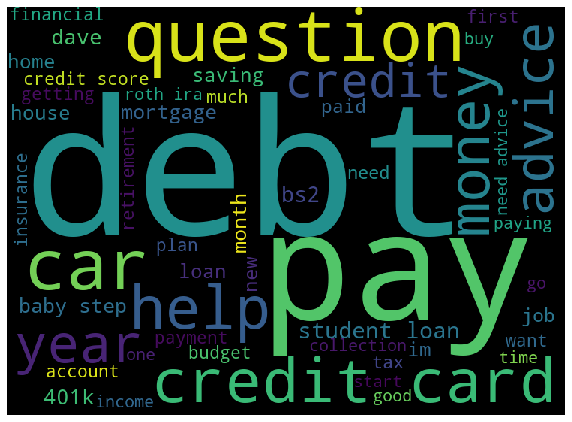

In [16]:
text = ' '

en_stopwords = list(nltk.corpus.stopwords.words('english'))

# iterate through the lemmatised titles column of the combined dataframe
for x in comb_df.titles_lemmatized: 
          
    for words in x: 
        text = text + words + ' '
  
titles_wc = WordCloud(max_words= 50,
                      width = 744, 
                      height = 544,
                      background_color ='black',
                      stopwords=en_stopwords.extend(['x200b','amp']), 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(titles_wc) 
plt.axis("off")
plt.savefig('./images/reddit_titles_wordcloud.png')

In [17]:
def word_count(string):
    counts = dict()
    words = string.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [18]:
#get word count for wods present in all titles, then show top 10 most common words
title_wordcount_df = pd.DataFrame(word_count(text),index=['word_count']).T.sort_values(by='word_count',ascending=False).reset_index()
title_wordcount_df = title_wordcount_df.rename(index=str,columns={'index':'word'})

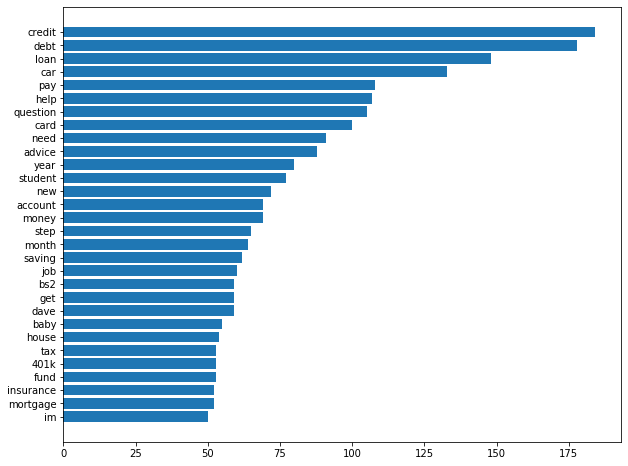

In [19]:
plt.figure(figsize=(10,8))
plt.barh(y=title_wordcount_df['word'].head(30)[::-1],
         width=title_wordcount_df['word_count'].head(30)[::-1])
plt.savefig('./images/reddit_titles_common_words.png')

In [20]:
len(title_wordcount_df['word'])

2563

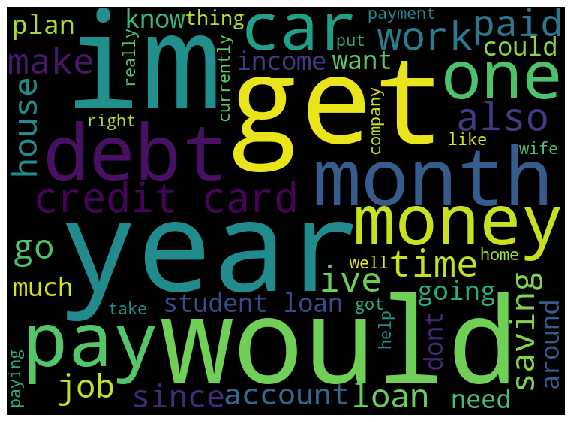

In [21]:
text2 = ' '
  
# iterate through the lemmatised post text column of the combined dataframe
for x in comb_df.posts_lemmatized: 
          
    for words in x: 
        text2 = text2 + words + ' '
  
posts_wc = WordCloud(max_words= 50,
                      width = 744, 
                      height = 544,
                      background_color ='black',
                      stopwords=en_stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(posts_wc) 
plt.axis("off")
plt.savefig('./images/reddit_posts_wordcloud.png')

In [22]:
#get word count for words present in all titles, then show top 10 most common words
post_wordcount_df = pd.DataFrame(word_count(text2),index=['word_count']).T.sort_values(by='word_count',ascending=False).reset_index()
post_wordcount_df = post_wordcount_df.rename(index=str,columns={'index':'word'})

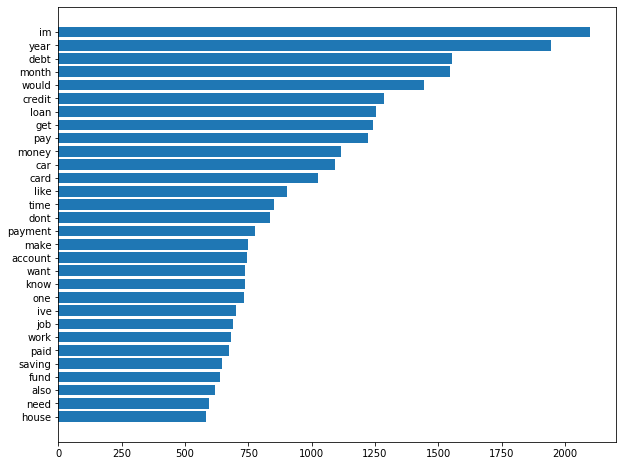

In [23]:
plt.figure(figsize=(10,8))
plt.barh(y=post_wordcount_df['word'].head(30)[::-1],
         width=post_wordcount_df['word_count'].head(30)[::-1])
plt.savefig('./images/reddit_posts_common_words.png')

In [24]:
comb_df.to_csv('./datasets/combined_df.csv')

#save wordcount DF in case it is relevant again later
title_wordcount_df.to_csv('./datasets/title_wordcount.csv')
post_wordcount_df.to_csv('./datasets/post_wordcount.csv')